In [61]:
try:
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
#     import scipy.stats as stats
#     import scipy.cluster.hierarchy as sch
#     from scipy.cluster.hierarchy import linkage
    from sklearn.cluster import KMeans
except Exception as e:
    print(e)
else:
    print('Import successfully')

    

Import successfully


In [2]:
telecom = pd.read_excel('Telco_customer_churn.xlsx')

In [8]:
telecom.drop('Customer ID',axis=1,inplace=True)


In [11]:
telecom.drop(['Count','Quarter'],axis=1,inplace=True)

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
telecom

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


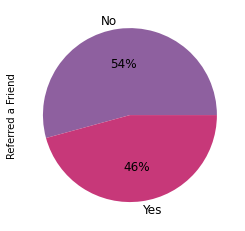

In [27]:
#EDA
telecom['Referred a Friend'].value_counts().plot(kind = 'pie', autopct='%2.0f%%',fontsize='12',colors=['#8e609f','#c73879'])
plt.show()

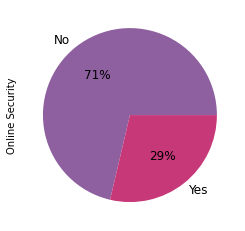

In [26]:
telecom['Online Security'].value_counts().plot(kind = 'pie', autopct='%2.0f%%',fontsize='12',colors=['#8e609f','#c73879'])
plt.show() #we can drop online security

In [ ]:
# Since from previous Online Security status most of the customer not secured with any schemes.

# So will drop the 'online security' Column. in analysis add it on after cluster no. results.

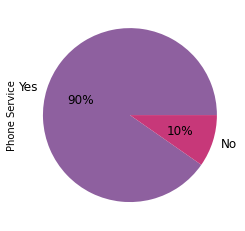

In [25]:
telecom['Phone Service'].value_counts().plot(kind = 'pie', autopct='%2.0f%%',fontsize='12',colors=['#8e609f','#c73879'])
plt.show()


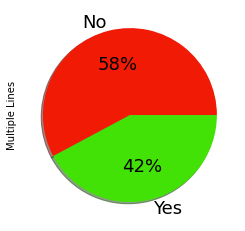

In [23]:
# Since most of the customers suing phone services we can drop phone services. In analysis
telecom['Multiple Lines'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()


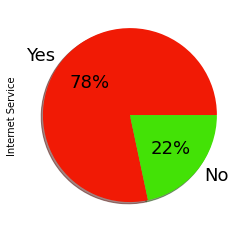

In [24]:
telecom['Internet Service'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()


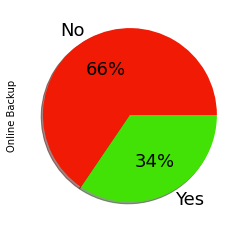

In [29]:
telecom['Online Backup'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

#most of the custmoer don't use back up hece we can drop online backup

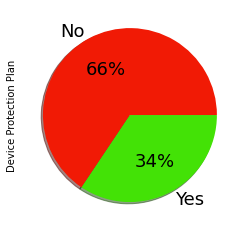

In [30]:
telecom['Device Protection Plan'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

#most of the custmoer don't use device protection plan we can drop this col

In [31]:
telecom.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


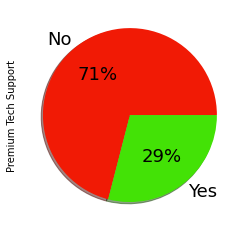

In [32]:
telecom['Premium Tech Support'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

Most of the customer not using premium tech support hecnce we are not going to we can ignore in analysis

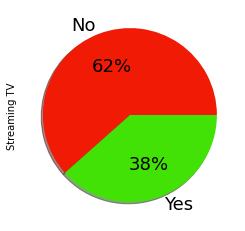

In [33]:
telecom['Streaming TV'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

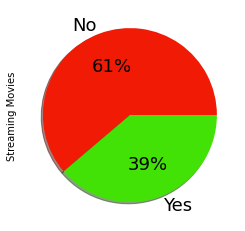

In [34]:
telecom['Streaming Movies'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

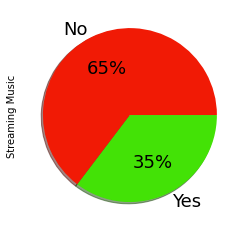

In [35]:
telecom['Streaming Music'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

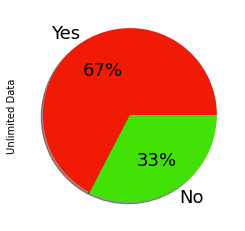

In [37]:
telecom['Unlimited Data'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

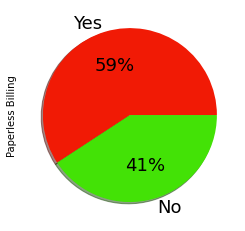

In [38]:
telecom['Paperless Billing'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

#in different streaming services we onbserve that most of the customer using same kind of service so this feature not that much useful in our analysis

In [44]:
telecom_data.drop(['Online Security',
              'Phone Service',
              'Internet Service',
              'Online Backup',
              'Device Protection Plan',
              'Premium Tech Support',
              'Unlimited Data',
             'Streaming TV',
             'Streaming Movies',
             'Streaming Music'],axis=1,inplace=True)

In [43]:
telecom_data = telecom.copy()

In [45]:
telecom_data.shape

(7043, 17)

In [46]:
telecom.shape

(7043, 27)

In [47]:
telecom_data.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,No,0,1,None,0.00,No,DSL,8,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,Yes,1,8,Offer E,48.85,Yes,Fiber Optic,17,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,No,0,18,Offer D,11.33,Yes,Fiber Optic,52,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,Yes,1,25,Offer C,19.76,No,Fiber Optic,12,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,Yes,1,37,Offer C,6.33,Yes,Fiber Optic,14,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [48]:
telecom_data.corr()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Number of Referrals,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853
Tenure in Months,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146
Avg Monthly Long Distance Charges,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291
Avg Monthly GB Download,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726
Monthly Charge,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.033482,0.126244,0.246300,0.588887
Total Charges,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.039558,0.121859,0.610185,0.972212
Total Refunds,0.024756,0.059021,-0.018644,0.002397,0.033482,0.039558,1.000000,0.016755,0.028113,0.036984
Total Extra Data Charges,0.000350,0.082266,0.002414,0.088939,0.126244,0.121859,0.016755,1.000000,0.058871,0.122496
Total Long Distance Charges,0.216190,0.674149,0.599828,0.011373,0.246300,0.610185,0.028113,0.058871,1.000000,0.778559
Total Revenue,0.261853,0.853146,0.232291,0.180726,0.588887,0.972212,0.036984,0.122496,0.778559,1.000000


<AxesSubplot:>

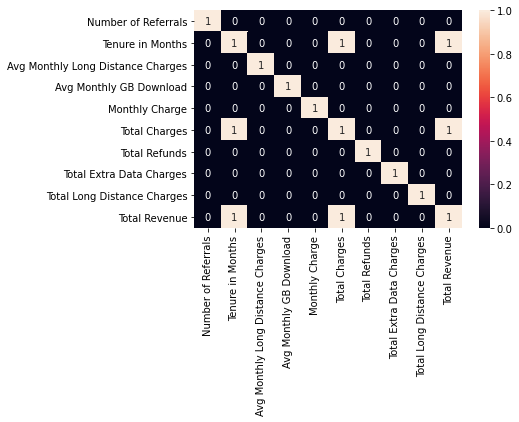

In [50]:
sns.heatmap(telecom_data.corr()>0.80, annot=True)

Since there is no correlation between variables. So need not to go with PCA. Before applying clustering. For the First Stage

In [59]:
color = dict(boxes ='#db091c',
        medians ='#0ff015',
        whiskers ='#e41b83',
        caps ='#0ff015')

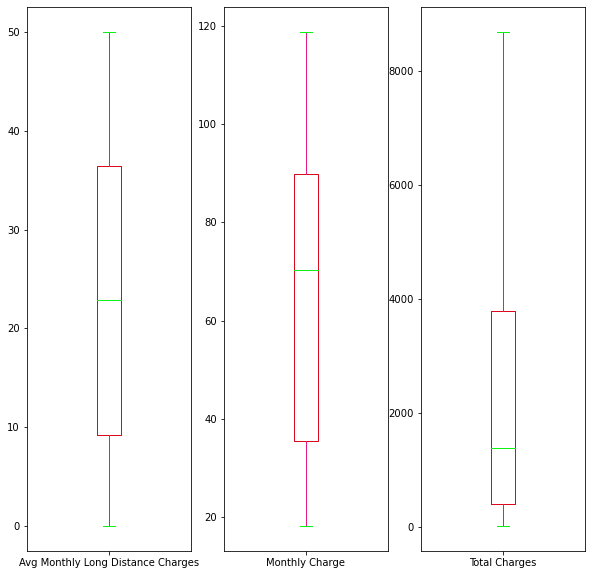

In [60]:
telecom_data[['Avg Monthly Long Distance Charges', 'Monthly Charge','Total Charges']].plot(
    kind = 'box', 
    subplots = bool, 
    color = color,
    figsize = (10,10))
plt.show()


No outliers here

In [62]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [63]:
lb = LabelEncoder()

In [66]:
telecom_data['Referred a Friend'] = lb.fit_transform(telecom_data['Referred a Friend'])

In [69]:
telecom_data['Multiple Lines'] = lb.fit_transform(telecom_data['Multiple Lines'])

In [70]:
telecom_data['Paperless Billing'] = lb.fit_transform(telecom_data['Paperless Billing'])

In [84]:
#ordinal encoding
offer_dict = {'None' : 0,'Offer B':1,'Offer E':2,'Offer D':3,'Offer A':4,'Offer C':5}

In [86]:
telecom_data.Offer = telecom_data.Offer.map(offer_dict)

In [87]:
telecom_data.Offer.value_counts()

0    3877
1     824
2     805
3     602
4     520
5     415
Name: Offer, dtype: int64

In [90]:
Contract_dict = {'Month-to-Month': 3, 'Two Year': 1, 'One Year': 2}

In [91]:
telecom_data.Contract = telecom_data.Contract.map(Contract_dict)

In [92]:
telecom_data['Payment Method'].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: Payment Method, dtype: int64

In [93]:
pmt_meth = {'Bank Withdrawal':2,'Credit Card':1,'Mailed Check':3}

In [94]:
telecom_data['Payment Method'] = telecom_data['Payment Method'].map(pmt_meth)

In [98]:
telecom_data['Internet Type'] = telecom_data['Internet Type'].map(int_type)

In [97]:
int_type = {'Fiber Optic': 1, 'DSL': 2, 'None': 0, 'Cable': 3}

In [99]:
telecom_data

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,0,1,0,0.00,0,2,8,3,1,2,39.65,39.65,0.00,20,0.00,59.65
1,1,1,8,2,48.85,1,1,17,3,1,1,80.65,633.30,0.00,0,390.80,1024.10
2,0,0,18,3,11.33,1,1,52,3,1,2,95.45,1752.55,45.61,0,203.94,1910.88
3,1,1,25,5,19.76,0,1,12,3,1,2,98.50,2514.50,13.43,0,494.00,2995.07
4,1,1,37,5,6.33,1,1,14,3,1,2,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,0,22.77,0,0,0,1,1,2,21.15,1419.40,19.31,0,1639.44,3039.53
7039,1,1,24,5,36.05,1,3,24,2,1,3,84.80,1990.50,48.23,0,865.20,2807.47
7040,1,4,72,0,29.66,1,1,59,2,1,1,103.20,7362.90,45.38,0,2135.52,9453.04
7041,1,1,11,0,0.00,0,2,17,3,1,2,29.60,346.45,27.24,0,0.00,319.21


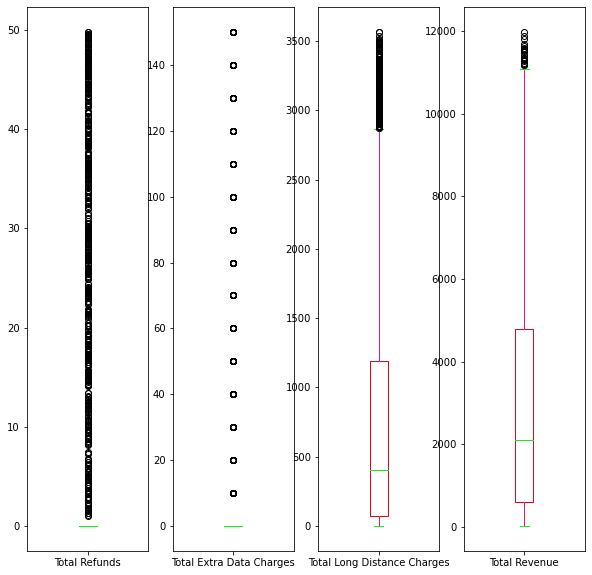

In [100]:
telecom_data[['Total Refunds', 'Total Extra Data Charges','Total Long Distance Charges','Total Revenue']].plot(
    kind = 'box', 
    subplots = bool, 
    color = color,
    figsize = (10,10))
plt.show()

In [101]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5,
                          variables=[ 'Total Refunds', 'Total Extra Data Charges','Total Long Distance Charges','Total Revenue'])
telecom_data = winsor.fit_transform(telecom_data)

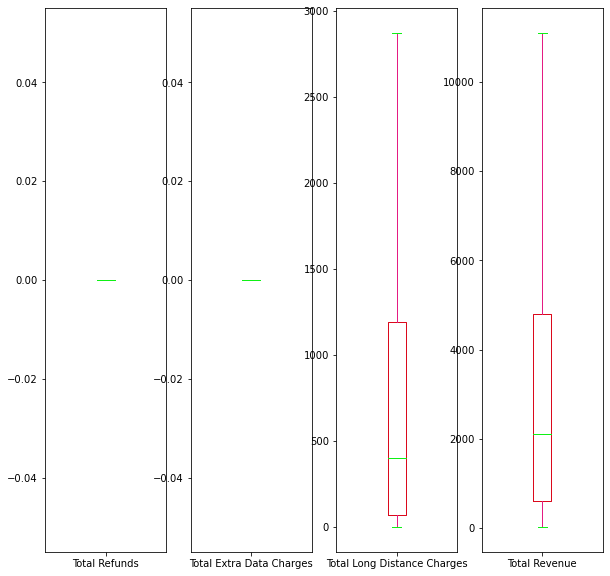

In [102]:
telecom_data[['Total Refunds', 'Total Extra Data Charges','Total Long Distance Charges','Total Revenue']].plot(
    kind = 'box', 
    subplots = bool, 
    color = color,
    figsize = (10,10))
plt.show()

Now we have treated outliers now we can apply KMeans and PCA for optimum feature selection and clustering

In [103]:
telecom_data['Total Refunds'].value_counts()

0.0    7043
Name: Total Refunds, dtype: int64

In [105]:
telecom_data['Total Refunds'] = telecom['Total Refunds'] #here by mistake I remove data from our target 

In [110]:
telecom_data['Total Refunds'] #our target columns is Total refund

0        0.00
1        0.00
2       45.61
3       13.43
4        0.00
        ...  
7038    19.31
7039    48.23
7040    45.38
7041    27.24
7042     0.00
Name: Total Refunds, Length: 7043, dtype: float64

In [112]:
# Standardization of dataset1

from sklearn.preprocessing import StandardScaler
telecom_std = StandardScaler().fit_transform(telecom_data)

In [114]:
telecom_std.shape

(7043, 17)

In [117]:
#using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
telecome_minmax = MinMaxScaler()
telecom_MinMax = telecome_minmax.fit_transform(telecom_data)

In [118]:
telecom_MinMax.shape

(7043, 17)

#### Rinning PCA on std

In [ ]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

In [120]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
telecom_std_df = pca_std.fit_transform(telecom_std)

In [121]:
telecom_std_df

array([[-2.9297875 , -0.83681862,  0.56099586, ..., -0.61289482,
         0.03447156, -0.38434068],
       [-0.54163485, -0.48910316, -0.88099666, ..., -0.58413033,
        -0.49209831,  0.27215848],
       [-0.43945573, -2.42722421,  0.16544723, ...,  1.02773556,
        -0.34639989, -0.25016762],
       ...,
       [ 4.76558763, -0.7686393 ,  0.33628558, ...,  1.1999315 ,
         0.33628936, -0.74707303],
       [-2.10556149, -0.26322475,  1.82296695, ..., -0.38937393,
         0.12641959, -0.94918046],
       [ 3.13060691, -0.36246138, -1.56581158, ...,  0.44632058,
         0.94494293,  0.89222919]])

In [122]:
#eigne values
pca_std.singular_values_


array([180.28218719, 121.63276028, 105.46968657,  91.29349363,
        85.70913607,  84.22430667,  82.22660163,  79.23723166,
        73.16012018,  62.31407376,  58.83564098,  50.17640194])

In [123]:
# variance containing in each formed PCA

pca_std.explained_variance_ratio_*100

array([28.84217221, 13.12875228,  9.87137476,  7.39608652,  6.5189337 ,
        6.29502151,  5.99994145,  5.57161267,  4.74975435,  3.4458361 ,
        3.07187336,  2.23419646])

In [124]:
#cummulative variance ratio
#will give idea of how many num of PCA, the cummulative additon of variance will hive much info
cum_var = np.cumsum(pca_std.explained_variance_ratio_*100)

In [125]:
cum_var

array([28.84217221, 41.97092449, 51.84229925, 59.23838577, 65.75731947,
       72.05234097, 78.05228242, 83.62389508, 88.37364944, 91.81948554,
       94.8913589 , 97.12555536])

by applying PCA on standardized data with 95% variance it gives 12 PCA components

### PCA on MINMAX 

In [126]:
pca_minmax = PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(telecom_MinMax)

In [127]:
pca_minmax_df

array([[-1.01152262, -0.36418333, -0.29957592, ...,  0.02549255,
        -0.24405551, -0.04125114],
       [ 0.1605507 , -0.49932109, -0.4114235 , ...,  0.24858536,
         0.08916479, -0.19051322],
       [-0.17379657, -0.9583156 ,  0.15011433, ..., -0.06738311,
         0.22776576,  0.22714185],
       ...,
       [ 1.42684436, -0.36600665, -0.1145006 , ..., -0.27850019,
         0.13316609,  0.27065282],
       [-0.51127495,  0.01336561, -0.98389847, ...,  0.01491482,
        -0.2889092 , -0.00688236],
       [ 0.57453934, -0.21001   ,  0.44685223, ..., -0.24437626,
         0.15942616, -0.229212  ]])

In [128]:
# eigenvalues..

pca_minmax.singular_values_

array([60.75014197, 47.42209883, 39.3900015 , 34.2418721 , 30.69823756,
       28.77173978, 26.8020037 , 23.44391617, 21.02954609, 17.7161856 ,
       15.51070641])

In [130]:
# variance containing in each formed PCA

len(pca_minmax.explained_variance_ratio_*100)

11

By applying PCA on MinMaxscalr transformation data gives 11 PCA components.

How many numbers of cluster. Also deciding which transformation data we will use to build model.

In [131]:
from yellowbrick.cluster import KElbowVisualizer

In [143]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=30)

In [144]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1,
                               k=(2, 10),
                               metric='silhouette',
                               timings=False)
visualizer2 = KElbowVisualizer(model2,
                               k=(2, 10),
                               metric='silhouette',
                               timings=False)

In [145]:
print('model1')
visualizer1.fit(telecom_std_df)
# visualizer1.poof()----this method is deparcated
visualizer1.show()

model1


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [146]:
print('model2')
visualizer2.fit(telecom_std_df)
# visualizer1.poof()----this method is deparcated
visualizer1.show()

model2


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

In [153]:
from sklearn.metrics import silhouette_score
list1  = [1,3,4,5,6,7,8,9,10]

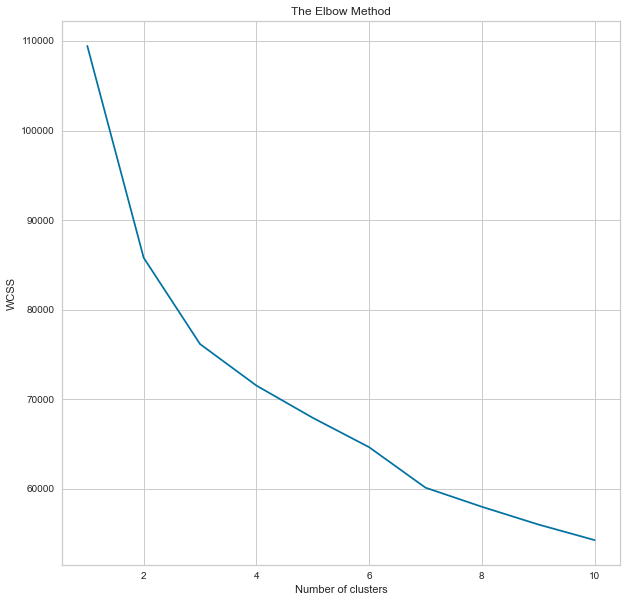

In [161]:
plt.figure(figsize=(10,10))
WCSS = [] #Within cluster sum of squares

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    Kmeans.fit(telecom_std_df)
    WCSS.append(Kmeans.inertia_)
    
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

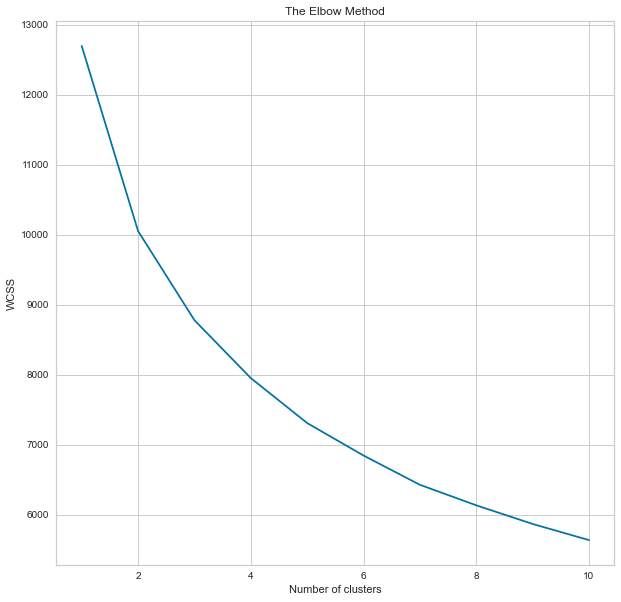

In [162]:
plt.figure(figsize=(10,10))
WCSS = [] #Within cluster sum of squares

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    Kmeans.fit(pca_minmax_df)
    WCSS.append(Kmeans.inertia_)
    
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [171]:
for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=6, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(telecom_std_df)
    sil_score1= silhouette_score(telecom_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.17862430685581535
For n_clusters = 3 The average silhouette_score is : 0.17862430685581535
For n_clusters = 4 The average silhouette_score is : 0.17862430685581535
For n_clusters = 5 The average silhouette_score is : 0.17862430685581535
For n_clusters = 6 The average silhouette_score is : 0.17862430685581535
For n_clusters = 7 The average silhouette_score is : 0.17862430685581535
For n_clusters = 8 The average silhouette_score is : 0.17862430685581535
For n_clusters = 9 The average silhouette_score is : 0.17862430685581535


In [167]:
sil_score1

0.15692195030125908

In [170]:
list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_minmax_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.17862430685581535
For n_clusters = 3 The average silhouette_score is : 0.17862430685581535
For n_clusters = 4 The average silhouette_score is : 0.17862430685581535
For n_clusters = 5 The average silhouette_score is : 0.17862430685581535
For n_clusters = 6 The average silhouette_score is : 0.17862430685581535
For n_clusters = 7 The average silhouette_score is : 0.17862430685581535
For n_clusters = 8 The average silhouette_score is : 0.17862430685581535
For n_clusters = 9 The average silhouette_score is : 0.17862430685581535


The range of Silhouette score is [-1, 1]. Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

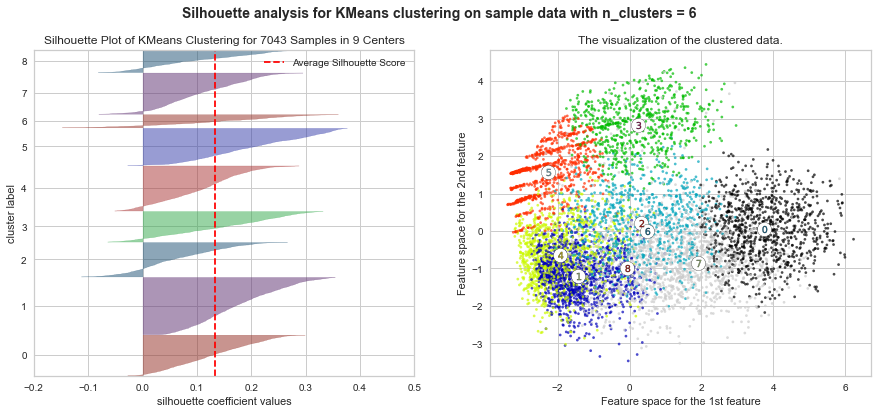

In [174]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(telecom_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(telecom_std_df[:, 0], telecom_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

SilhouetteVisualizer(ax=<AxesSubplot:>,
                     colors=['#922B21', '#5B2C6F', '#1B4F72', '#32a84a',
                             '#a83232', '#323aa8'],
                     estimator=KMeans(n_clusters=9, random_state=0))

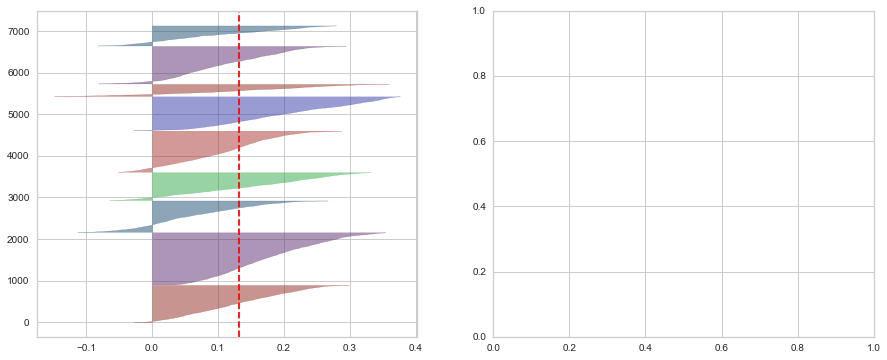

In [182]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(telecom_std_df)

In [175]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [176]:
model1_cluster

,Kmeans_Clustering
0,4
1,1
2,6
3,8
4,8
...,...
7038,3
7039,6
7040,6
7041,6


In [177]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([telecom.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Kmeans_Clustering
0,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,4
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,1
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,6
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,8
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,8


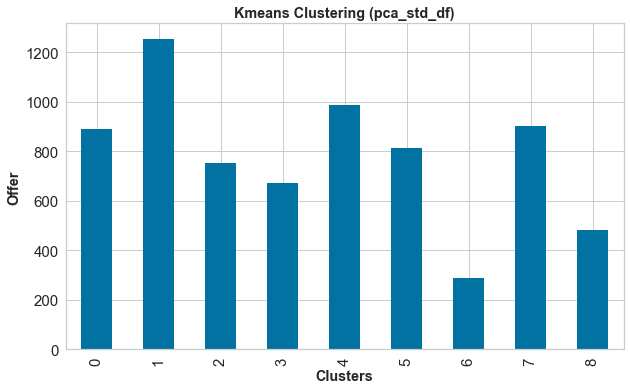

In [180]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['Offer'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Offer', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

customer from cluster 1,4,7 need attention

In [187]:
Kmeans_df[Kmeans_df['Kmeans_Clustering']==1 | 4 | 7]

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Kmeans_Clustering
21,No,0,54,Offer B,Yes,12.08,Yes,Yes,DSL,5,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,One Year,No,Bank Withdrawal,82.45,4350.10,0.00,0,652.32,5002.42,7
36,Yes,3,49,Offer B,Yes,22.92,Yes,Yes,Fiber Optic,14,No,Yes,No,No,No,Yes,No,Yes,Month-to-Month,No,Credit Card,90.05,4547.25,0.00,0,1123.08,5670.33,7
37,Yes,1,43,Offer B,Yes,14.52,Yes,Yes,Fiber Optic,5,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,110.75,4687.90,0.00,0,624.36,5312.26,7
38,No,0,56,Offer B,Yes,48.80,Yes,Yes,Fiber Optic,12,Yes,No,Yes,No,Yes,Yes,No,Yes,One Year,Yes,Bank Withdrawal,104.55,5794.65,0.00,0,2732.80,8527.45,7
44,Yes,1,33,None,Yes,27.78,Yes,Yes,Fiber Optic,8,No,No,No,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,94.50,3105.55,0.00,0,916.74,4022.29,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,Yes,1,62,Offer B,Yes,4.70,Yes,Yes,Cable,28,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,84.95,5150.55,4.68,0,291.40,5437.27,7
7023,No,0,40,Offer B,Yes,2.83,Yes,Yes,Fiber Optic,22,No,Yes,Yes,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,93.40,3756.40,4.18,0,113.20,3865.42,7
7024,No,0,41,Offer B,Yes,41.85,Yes,Yes,Fiber Optic,16,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,89.20,3645.75,2.21,0,1715.85,5359.39,7
7029,No,0,72,None,Yes,33.93,Yes,Yes,Fiber Optic,18,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,104.95,7544.30,25.42,0,2442.96,9961.84,7


In [203]:
Kmeans_df.groupby('Kmeans_Clustering').mean().T

Kmeans_Clustering,0,1,2,3,4,5,6,7,8
Number of Referrals,4.924804,0.311005,5.582228,4.026866,0.187437,0.619165,2.027682,0.329268,1.016598
Tenure in Months,64.728395,9.267943,36.783820,49.550746,16.290780,13.683047,37.027682,52.875831,25.433610
Avg Monthly Long Distance Charges,29.027609,27.365295,14.681724,27.218761,10.793941,23.386523,21.691522,26.823614,25.020000
Avg Monthly GB Download,27.903479,23.799043,31.469496,0.020896,25.987842,0.120393,20.356401,24.565410,25.421162
Monthly Charge,94.714198,79.924043,65.951194,22.097463,48.591388,21.001597,69.193080,91.059867,82.533610
Total Charges,6143.738384,761.944817,2386.251194,1098.574313,804.217021,282.837899,2513.996367,4819.213747,2071.430187
Total Refunds,0.781785,0.209864,0.660610,0.579254,0.390243,0.354570,36.879204,0.496253,0.402925
Total Extra Data Charges,10.763187,6.124402,9.734748,0.134328,6.818642,0.098280,9.031142,10.554324,9.709544
Total Long Distance Charges,1853.964534,245.589561,415.505796,1314.531418,109.658987,291.120725,806.199654,1382.924601,615.003299
Total Revenue,8007.684321,1013.448915,2810.831127,2412.660806,920.304407,573.702334,3292.347958,6212.196419,2695.740104
